In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart_v2.csv")

Part A – Basic Implementation

In [3]:
X = df.drop("heart disease", axis=1)
y = df["heart disease"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [6]:
print("Training Accuracy:", clf.score(X_train, y_train))
print("Testing Accuracy:", clf.score(X_test, y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.6666666666666666


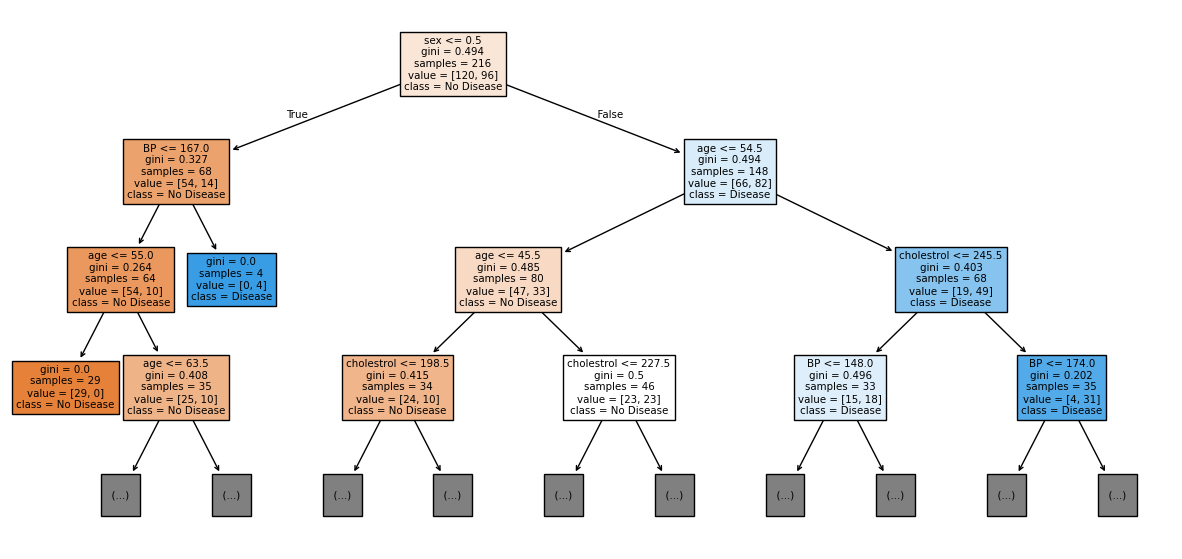

In [7]:
plt.figure(figsize=(15,7))
plot_tree(clf, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True, max_depth=3)
plt.show()

Part B – Model Evaluation

In [8]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [9]:
y_pred = clf.predict(X_test)

In [10]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[19 11]
 [ 7 17]]


In [12]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.63      0.68        30
           1       0.61      0.71      0.65        24

    accuracy                           0.67        54
   macro avg       0.67      0.67      0.67        54
weighted avg       0.68      0.67      0.67        54



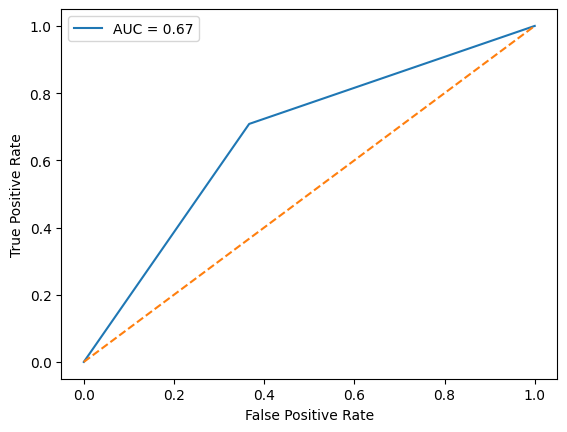

AUC Score: 0.6708333333333334


In [ ]:
y_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],"--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

print("AUC Score:", roc_auc)
#AUC-> threshold independent score

Part C – Hyperparameter Tuning

In [14]:
for depth in [2,3,4,5,6,None]:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    print(f"Depth={depth}, Train={clf.score(X_train,y_train):.2f}, Test={clf.score(X_test,y_test):.2f}")


Depth=2, Train=0.71, Test=0.63
Depth=3, Train=0.71, Test=0.63
Depth=4, Train=0.77, Test=0.65
Depth=5, Train=0.83, Test=0.65
Depth=6, Train=0.88, Test=0.63
Depth=None, Train=1.00, Test=0.67


In [15]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'max_depth': [2,3,4,5,6,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

#cv = cross validation
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best Params: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Score: 0.694291754756871


Part D – Error Analysis

In [17]:
misclassified_idx = X_test[y_test != y_pred].index
print("Misclassified Patients:\n", df.loc[misclassified_idx])

Misclassified Patients:
      age  sex   BP  cholestrol  heart disease
162   55    1  130         262              0
66    51    1  140         261              0
38    42    1  130         180              0
97    58    1  100         234              1
61    51    0  130         305              1
144   54    1  192         283              1
3     64    1  128         263              0
49    65    0  150         225              1
188   62    0  140         394              0
211   51    1  125         245              0
194   48    1  124         255              0
234   62    1  130         231              0
268   57    1  140         192              0
165   64    0  180         325              0
227   43    0  132         341              1
35    48    1  130         256              1
187   52    1  108         233              0
9     63    0  150         407              1


In [18]:
correct_idx = X_test[y_test == y_pred].index
print("Correctly Classified Sample:\n", df.loc[correct_idx].head())

Correctly Classified Sample:
      age  sex   BP  cholestrol  heart disease
195   55    0  135         250              0
132   42    1  140         226              0
129   60    1  117         230              1
254   59    1  150         212              0
65    57    1  150         276              1


Part E – Class Imbalance Check

In [19]:
print("Class Distribution:\n", y.value_counts())

Class Distribution:
 heart disease
0    150
1    120
Name: count, dtype: int64


In [20]:
from sklearn.metrics import balanced_accuracy_score
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))

Balanced Accuracy: 0.6708333333333334


In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print("After SMOTE:", y_res.value_counts())

After SMOTE: heart disease
0    120
1    120
Name: count, dtype: int64
